In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pprint import pprint
import networkx as nx

import syft as sy
from syft.service.action.action_graph_service import ActionGraphService, NodeActionDataUpdate, ExecutionStatus
from syft.service.action.action_graph_service import NodeActionData, NodeType
from syft.service.action.action_graph import InMemoryActionGraphStore, InMemoryGraphConfig, InMemoryStoreClientConfig
from syft.service.action.action_graph import NetworkXBackingStore
from syft.service.context import AuthedServiceContext
from syft.node.credentials import SyftSigningKey, SyftVerifyKey
from syft.service.action.action_graph import Action
from syft.service.action.numpy import NumpyArrayObject, ActionObject
from syft.service.action.action_graph_service import ExecutionStatusPartitionKey
from syft.store.document_store import QueryKeys
from syft.service.response import SyftError
print(sy.__version__)

signing_key = SyftSigningKey.generate()
verify_key = signing_key.verify_key
in_mem_graph_config = InMemoryGraphConfig()
authed_context = AuthedServiceContext(credentials=verify_key)

kj/filesystem-disk-unix.c++:1703: warning: PWD environment variable doesn't match current directory; pwd = /home/dk/Desktop/projects/PySyft


0.8.1-beta.1


## `add_action_obj`

In [2]:
in_mem_graph_store = InMemoryActionGraphStore(in_mem_graph_config)
in_mem_action_graph_service = ActionGraphService(store=in_mem_graph_store)

In [3]:
action_obj = ActionObject.from_obj([1, 2, 3])
in_mem_action_graph_service.add_action_obj(
    context=authed_context, action_obj=action_obj
)

```python
class NodeActionData:
  id: str = cda50517ef5f4f42ba78e61ba9a1ee82
  type: str = NodeType.ACTION_OBJECT
  status: str = ExecutionStatus.PROCESSING
  retry: str = 0
  created_at: str = 2023-05-12 02:24:35
  updated_at: str = None
  user_verify_key: str = f76eda86167ff87203bb5106974e8f9749775e6222d0a4ce8e339e5333a3bc92
  is_mutated: str = False
  is_mutagen: str = False
  next_mutagen_node: str = None
  last_nm_mutagen_node: str = None

```

In [4]:
error = in_mem_action_graph_service.add_action_obj(
    context=authed_context, action_obj=action_obj
)

In [5]:
action_obj.id

<UID: cda50517ef5f4f42ba78e61ba9a1ee82>

In [6]:
'Node already exists in the graph' in error.message

True

## `add_action` (no mutagen)

action_obj_a = [1, 2 ,3]  
action_obj_b = [2, 3, 4]  
action = add(a, b)  

In [2]:
in_mem_graph_store = InMemoryActionGraphStore(in_mem_graph_config, 
                                              reset=True)
in_mem_action_graph_service = ActionGraphService(store=in_mem_graph_store)
G = in_mem_action_graph_service.store.graph.db
labels_dict = {}

In [3]:
action_obj_a = ActionObject.from_obj([1, 2, 3])
action_obj_b = ActionObject.from_obj([2, 3, 4])
in_mem_action_graph_service.add_action_obj(
    context=authed_context, action_obj=action_obj_a
)
in_mem_action_graph_service.add_action_obj(
    context=authed_context, action_obj=action_obj_b
)
labels_dict[action_obj_a.id] = "A"
labels_dict[action_obj_b.id] = "B"

In [4]:
action = Action(
    path="action.execute",
    op="__add__",
    remote_self=action_obj_a.syft_lineage_id,
    args=[action_obj_b.syft_lineage_id],
    kwargs={}
)
labels_dict[action.id] = "+"
labels_dict[action.result_id.id] = "C"
action_node, result_node = in_mem_action_graph_service.add_action(
    context=authed_context, action=action
)

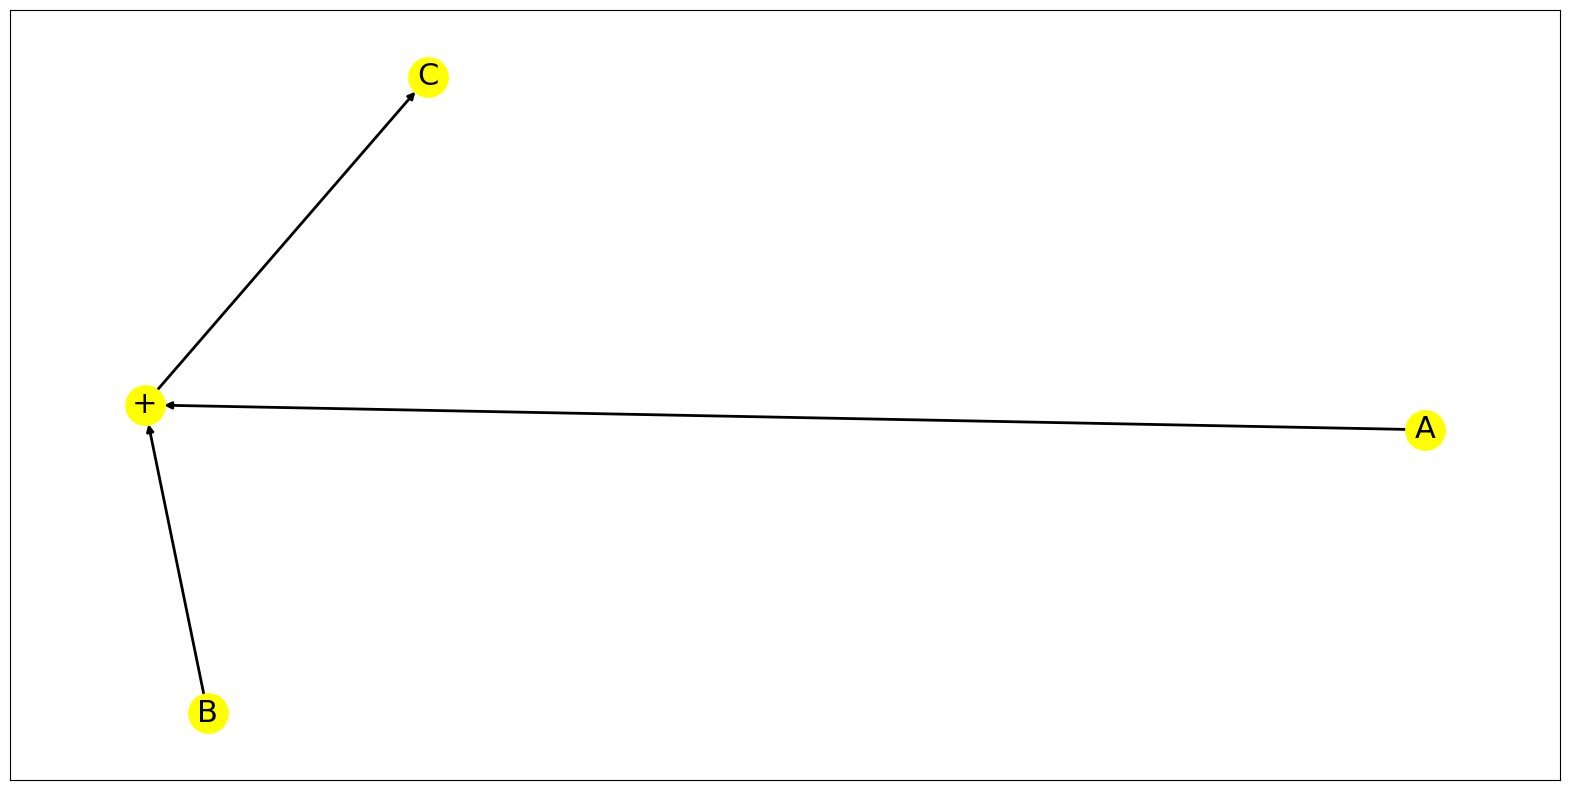

In [5]:
plt.figure(figsize=(20, 10))
pos = nx.spring_layout(G, seed=3113794652)
# nx.draw_networkx_nodes(G, pos=pos)
nx.draw_networkx(G, pos=pos, labels=labels_dict, with_labels=True, width=2.0, node_color="yellow", node_size=800, font_size=22)

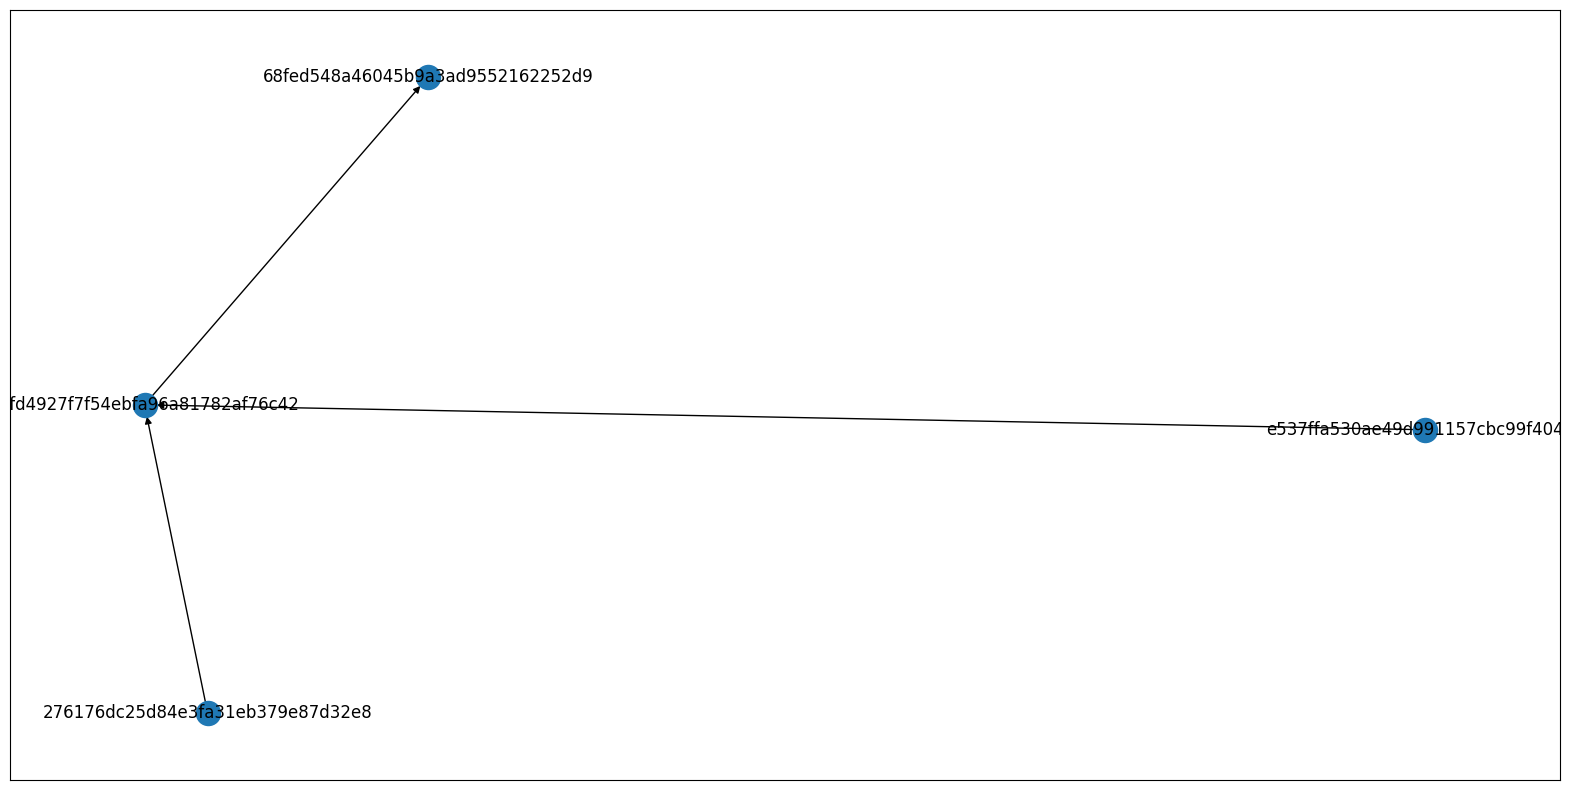

In [6]:
in_mem_action_graph_service.store.graph.visualize()

In [7]:
pprint(labels_dict)

{<UID: 0aac332cd84345c9a331946f9072947d>: 'A',
 <UID: 6e5db959929747db829864f69a4822d7>: 'C',
 <UID: cbfaa22bce6947d3819e8920688559f0>: '+',
 <UID: d9708b1965b64936b4412bfab0686500>: 'B'}


In [7]:
nodes = set(dict(in_mem_action_graph_service.get_all_nodes(context=authed_context)).keys())
nodes

{<UID: 276176dc25d84e3fa31eb379e87d32e8>,
 <UID: 33fd4927f7f54ebfa96a81782af76c42>,
 <UID: 68fed548a46045b9a3ad9552162252d9>,
 <UID: e537ffa530ae49d991157cbc99f40424>}

In [8]:
in_mem_action_graph_service.remove_node(authed_context,
                                        action.id)

<class 'syft.service.response.SyftSuccess'>: Successfully deleted node with uid: 33fd4927f7f54ebfa96a81782af76c42 from the graph.

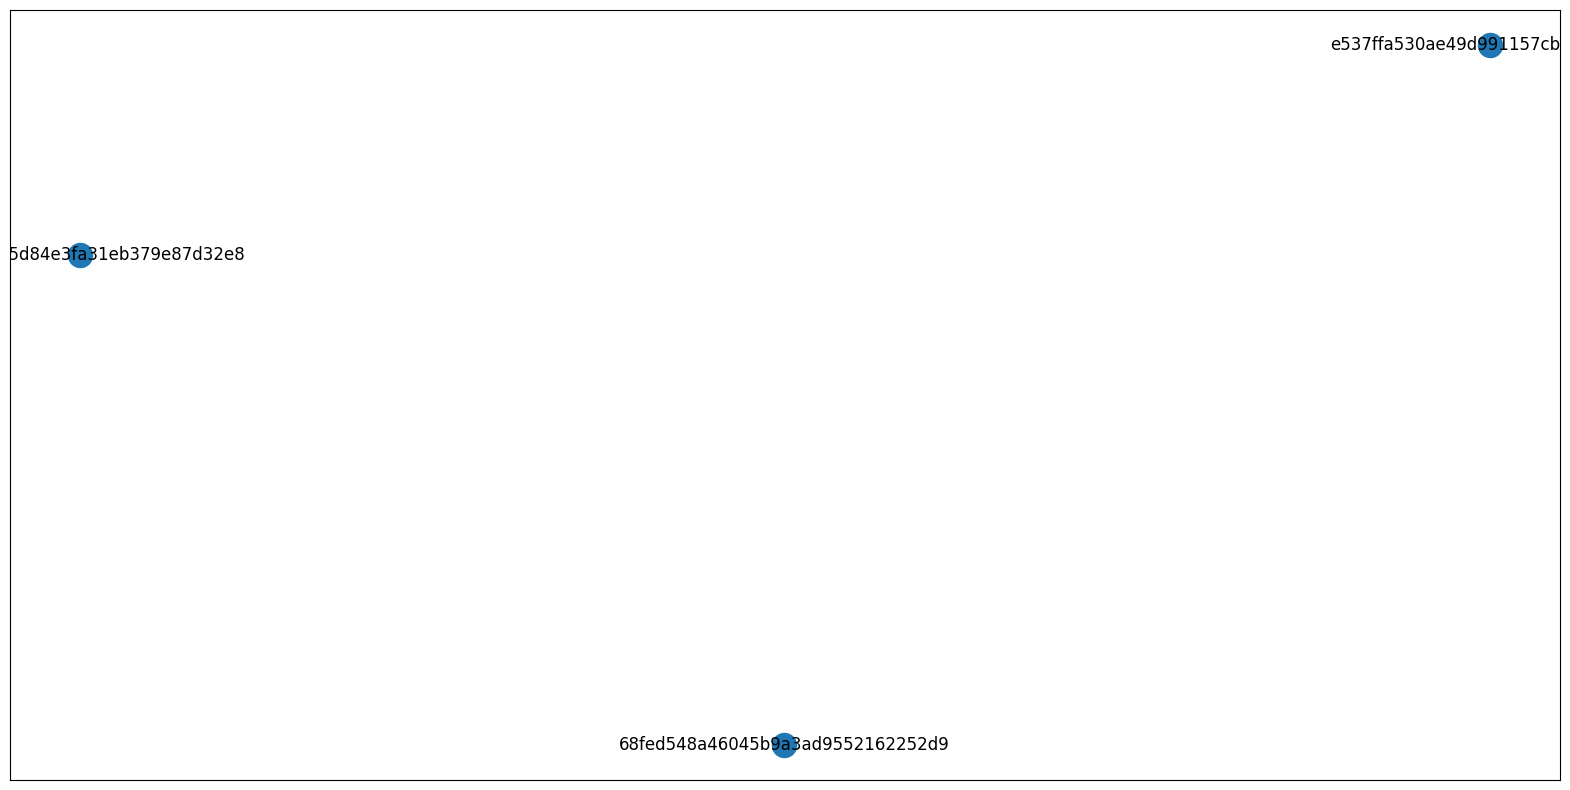

In [9]:
in_mem_action_graph_service.store.graph.visualize()

In [10]:
nodes_after_remove = set(dict(in_mem_action_graph_service.get_all_nodes(context=authed_context)).keys())
nodes_after_remove

{<UID: 276176dc25d84e3fa31eb379e87d32e8>,
 <UID: 68fed548a46045b9a3ad9552162252d9>,
 <UID: e537ffa530ae49d991157cbc99f40424>}

In [24]:
(nodes - nodes_after_remove).pop()

<UID: 33fd4927f7f54ebfa96a81782af76c42>

In [20]:
action_node.id 

<UID: 33fd4927f7f54ebfa96a81782af76c42>

In [29]:
from syft.types.uid import UID

UID()

<UID: 8bd8517e53e8401fbcdd74d1eb35513c>

NameError: name 'UID' is not defined

## `add_action` (mutagen)

In [13]:
in_mem_graph_store = InMemoryActionGraphStore(in_mem_graph_config, 
                                              reset=True)
in_mem_action_graph_service = ActionGraphService(store=in_mem_graph_store)
G = in_mem_action_graph_service.store.graph.db
labels_dict = {}

action_obj_d = ActionObject.from_obj([1, 2, 3])
in_mem_action_graph_service.add_action_obj(context=authed_context, 
                                           action_obj=action_obj_d)
labels_dict[action_obj_d.id] = "[1, 2 ,3]"

action = Action(
    path="action.execute",
    op="np.array",
    remote_self=None,
    args=[action_obj_d.syft_lineage_id],
    kwargs={}
)
action_node, result_node = in_mem_action_graph_service.add_action(
    context=authed_context, action=action
)
labels_dict[action.id] = "np.array"
labels_dict[action.result_id.id] = "d"

In [14]:
result_node

```python
class NodeActionData:
  id: str = faaa539f4a904ac29e3058284b4fb731
  type: str = NodeType.ACTION_OBJECT
  status: str = ExecutionStatus.PROCESSING
  retry: str = 0
  created_at: str = 2023-05-12 01:56:52
  updated_at: str = None
  user_verify_key: str = a2ac3919c0c8662fd7a08d27b75fdf289ada553438a336ad814a284553cac9e0
  is_mutated: str = False
  is_mutagen: str = False
  next_mutagen_node: str = None
  last_nm_mutagen_node: str = None

```

In [15]:
as_type_action_obj = ActionObject.from_obj('np.int32')
in_mem_action_graph_service.add_action_obj(context=authed_context, 
                                           action_obj=as_type_action_obj)
labels_dict[as_type_action_obj.id] = "np.int32"

action2 = Action(
    path="action.execute",
    op="astype",
    remote_self=action.result_id,
    args=[as_type_action_obj.syft_lineage_id],
    kwargs={},
    result_id=action.result_id
)
action_node_2, result_node_2 = in_mem_action_graph_service.add_action(
    context=authed_context, action=action2
)
labels_dict[action2.id] = "astype"

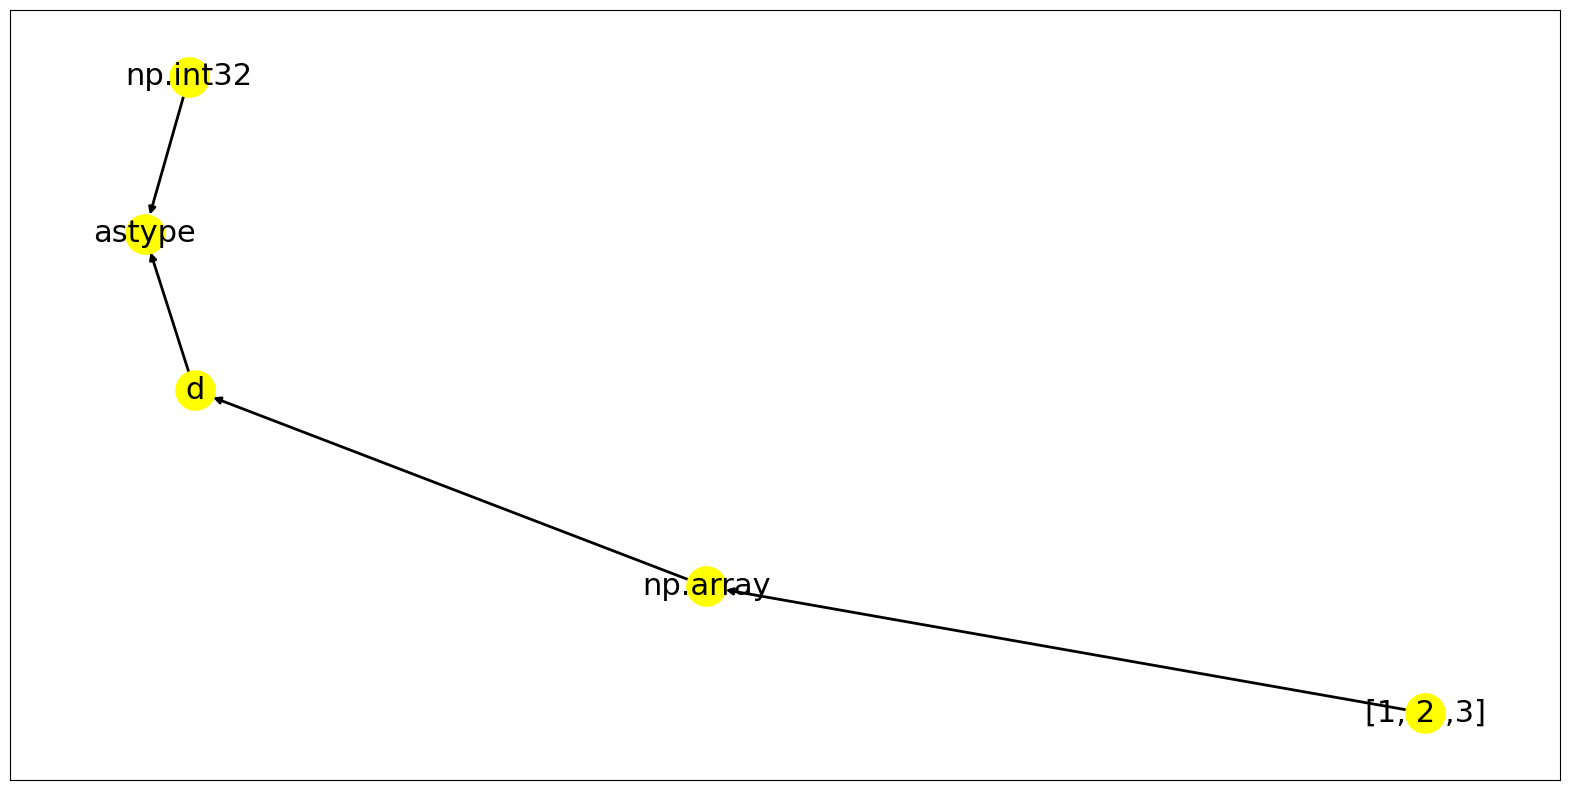

In [16]:
plt.figure(figsize=(20, 10))
pos = nx.spring_layout(G, seed=3113794652)
# nx.draw_networkx_nodes(G, pos=pos)p
nx.draw_networkx(G, pos=pos, labels=labels_dict, with_labels=True, width=2.0, 
                 node_color="yellow", node_size=800, font_size=22)

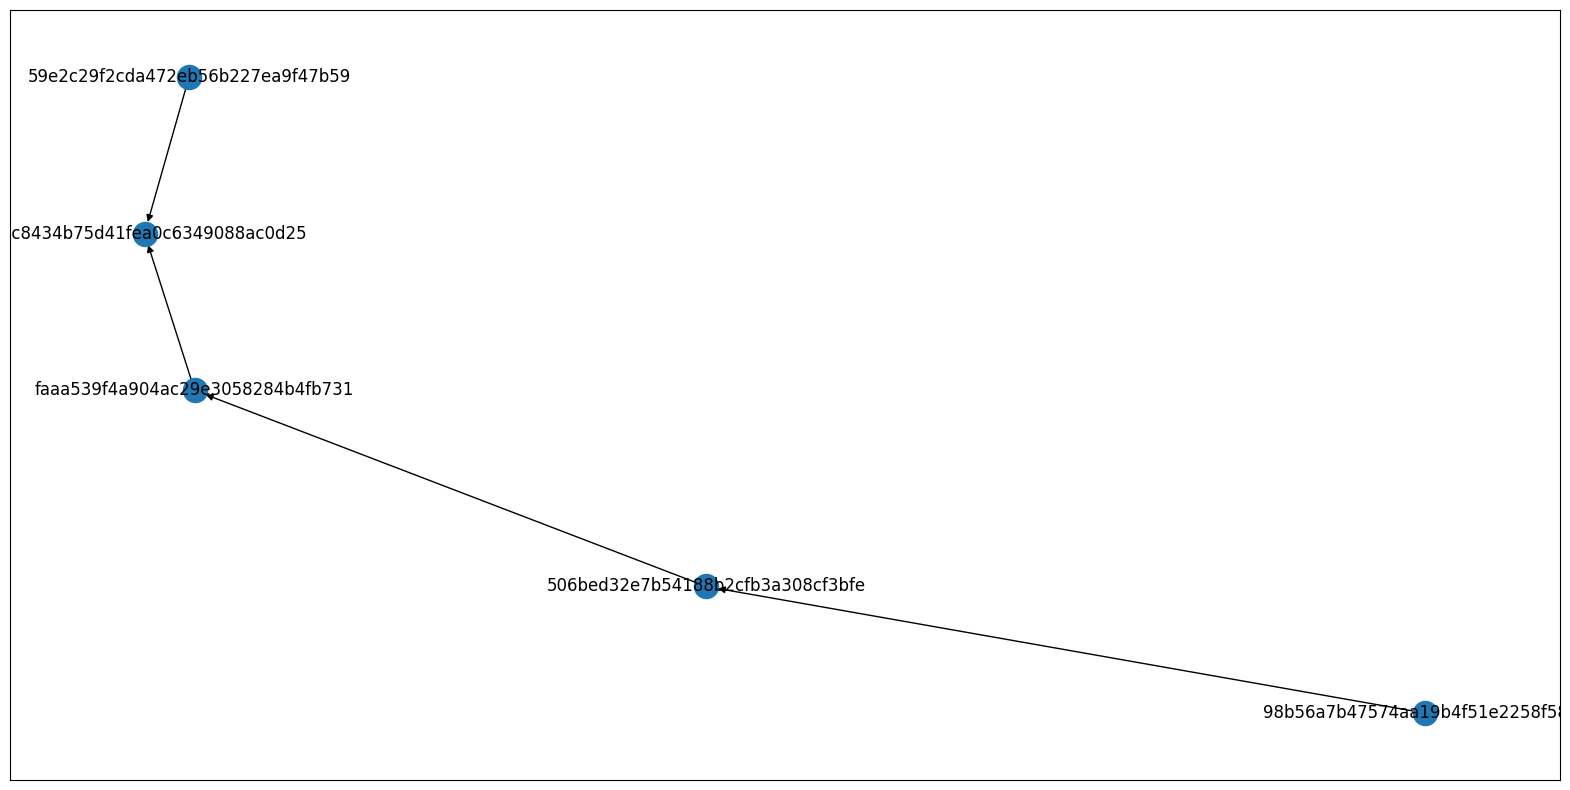

In [17]:
in_mem_action_graph_service.store.graph.visualize()

In [18]:
len(in_mem_action_graph_service.get_all_nodes(authed_context))

5

In [19]:
len(in_mem_action_graph_service.get_all_edges(authed_context))

4

In [20]:
print(labels_dict[action_node_2.id])
action_node_2

astype


```python
class NodeActionData:
  id: str = 2e4c8434b75d41fea0c6349088ac0d25
  type: str = NodeType.ACTION
  status: str = ExecutionStatus.PROCESSING
  retry: str = 0
  created_at: str = 2023-05-12 01:56:52
  updated_at: str = None
  user_verify_key: str = a2ac3919c0c8662fd7a08d27b75fdf289ada553438a336ad814a284553cac9e0
  is_mutated: str = False
  is_mutagen: str = True
  next_mutagen_node: str = None
  last_nm_mutagen_node: str = None

```

In [21]:
print(labels_dict[result_node_2.id])
result_node_2

d


```python
class NodeActionData:
  id: str = faaa539f4a904ac29e3058284b4fb731
  type: str = NodeType.ACTION_OBJECT
  status: str = ExecutionStatus.PROCESSING
  retry: str = 0
  created_at: str = 2023-05-12 01:56:52
  updated_at: str = 2023-05-12 01:56:52
  user_verify_key: str = a2ac3919c0c8662fd7a08d27b75fdf289ada553438a336ad814a284553cac9e0
  is_mutated: str = True
  is_mutagen: str = False
  next_mutagen_node: str = 2e4c8434b75d41fea0c6349088ac0d25
  last_nm_mutagen_node: str = 2e4c8434b75d41fea0c6349088ac0d25

```

In [22]:
print(labels_dict[result_node.id])
result_node

d


```python
class NodeActionData:
  id: str = faaa539f4a904ac29e3058284b4fb731
  type: str = NodeType.ACTION_OBJECT
  status: str = ExecutionStatus.PROCESSING
  retry: str = 0
  created_at: str = 2023-05-12 01:56:52
  updated_at: str = 2023-05-12 01:56:52
  user_verify_key: str = a2ac3919c0c8662fd7a08d27b75fdf289ada553438a336ad814a284553cac9e0
  is_mutated: str = True
  is_mutagen: str = False
  next_mutagen_node: str = 2e4c8434b75d41fea0c6349088ac0d25
  last_nm_mutagen_node: str = 2e4c8434b75d41fea0c6349088ac0d25

```

In [23]:
pprint(labels_dict)

{<UID: 2e4c8434b75d41fea0c6349088ac0d25>: 'astype',
 <UID: 506bed32e7b54188b2cfb3a308cf3bfe>: 'np.array',
 <UID: 59e2c29f2cda472eb56b227ea9f47b59>: 'np.int32',
 <UID: 98b56a7b47574aa19b4f51e2258f5868>: '[1, 2 ,3]',
 <UID: faaa539f4a904ac29e3058284b4fb731>: 'd'}


In [24]:
in_mem_action_graph_service.get_all_nodes(authed_context)

NodeDataView({<UID: 98b56a7b47574aa19b4f51e2258f5868>: {'data': class NodeActionData:
  id: str = 98b56a7b47574aa19b4f51e2258f5868
  type: str = NodeType.ACTION_OBJECT
  status: str = ExecutionStatus.PROCESSING
  retry: str = 0
  created_at: str = 2023-05-12 01:56:52
  updated_at: str = None
  user_verify_key: str = a2ac3919c0c8662fd7a08d27b75fdf289ada553438a336ad814a284553cac9e0
  is_mutated: str = False
  is_mutagen: str = False
  next_mutagen_node: str = None
  last_nm_mutagen_node: str = None
}, <UID: 506bed32e7b54188b2cfb3a308cf3bfe>: {'data': class NodeActionData:
  id: str = 506bed32e7b54188b2cfb3a308cf3bfe
  type: str = NodeType.ACTION
  status: str = ExecutionStatus.PROCESSING
  retry: str = 0
  created_at: str = 2023-05-12 01:56:52
  updated_at: str = None
  user_verify_key: str = a2ac3919c0c8662fd7a08d27b75fdf289ada553438a336ad814a284553cac9e0
  is_mutated: str = False
  is_mutagen: str = False
  next_mutagen_node: str = None
  last_nm_mutagen_node: str = None
}, <UID: faaa5

### Add another mutation

In [25]:
idx_action_obj = ActionObject.from_obj(2)
in_mem_action_graph_service.add_action_obj(context=authed_context, 
                                    action_obj=idx_action_obj)
labels_dict[idx_action_obj.id] = "idx=2"

item_val_action_obj = ActionObject.from_obj(5)
in_mem_action_graph_service.add_action_obj(context=authed_context, 
                                    action_obj=item_val_action_obj)
labels_dict[item_val_action_obj.id] = "val=5"

action3 = Action(
    path="action.execute",
    op="__setitem__",
    remote_self=action.result_id,
    args=[idx_action_obj.syft_lineage_id, item_val_action_obj.syft_lineage_id],
    kwargs={},
    result_id=action.result_id
)
action_node_3, result_node_3 = in_mem_action_graph_service.add_action(context=authed_context, 
                                       action=action3)
labels_dict[action3.id] = "__setitem__"

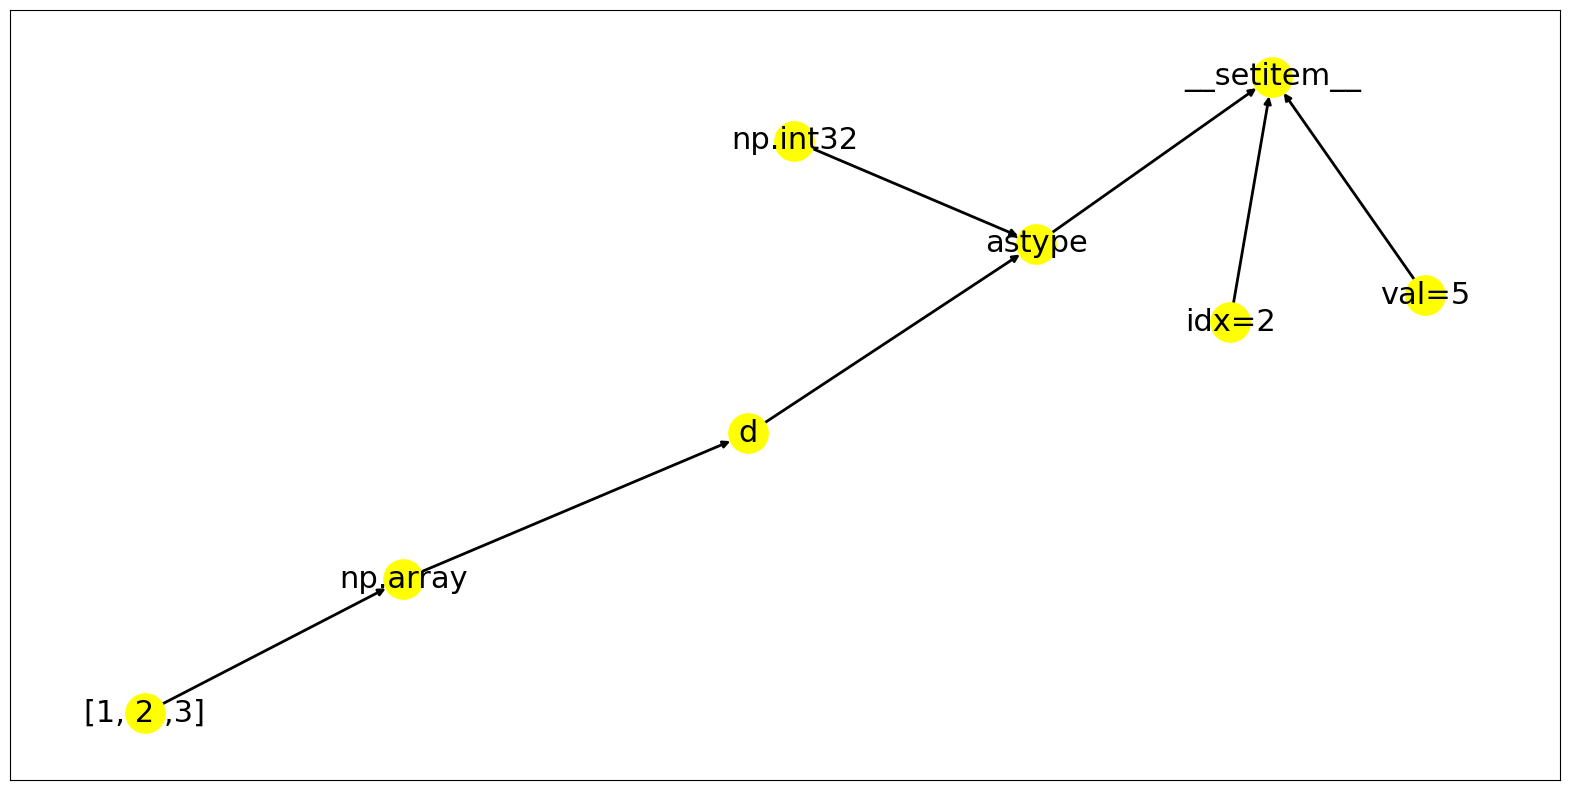

In [26]:
plt.figure(figsize=(20, 10))
pos = nx.spring_layout(G, seed=3113794652)
# nx.draw_networkx_nodes(G, pos=pos)p
nx.draw_networkx(G, pos=pos, labels=labels_dict, with_labels=True, width=2.0, 
                 node_color="yellow", node_size=800, font_size=22)

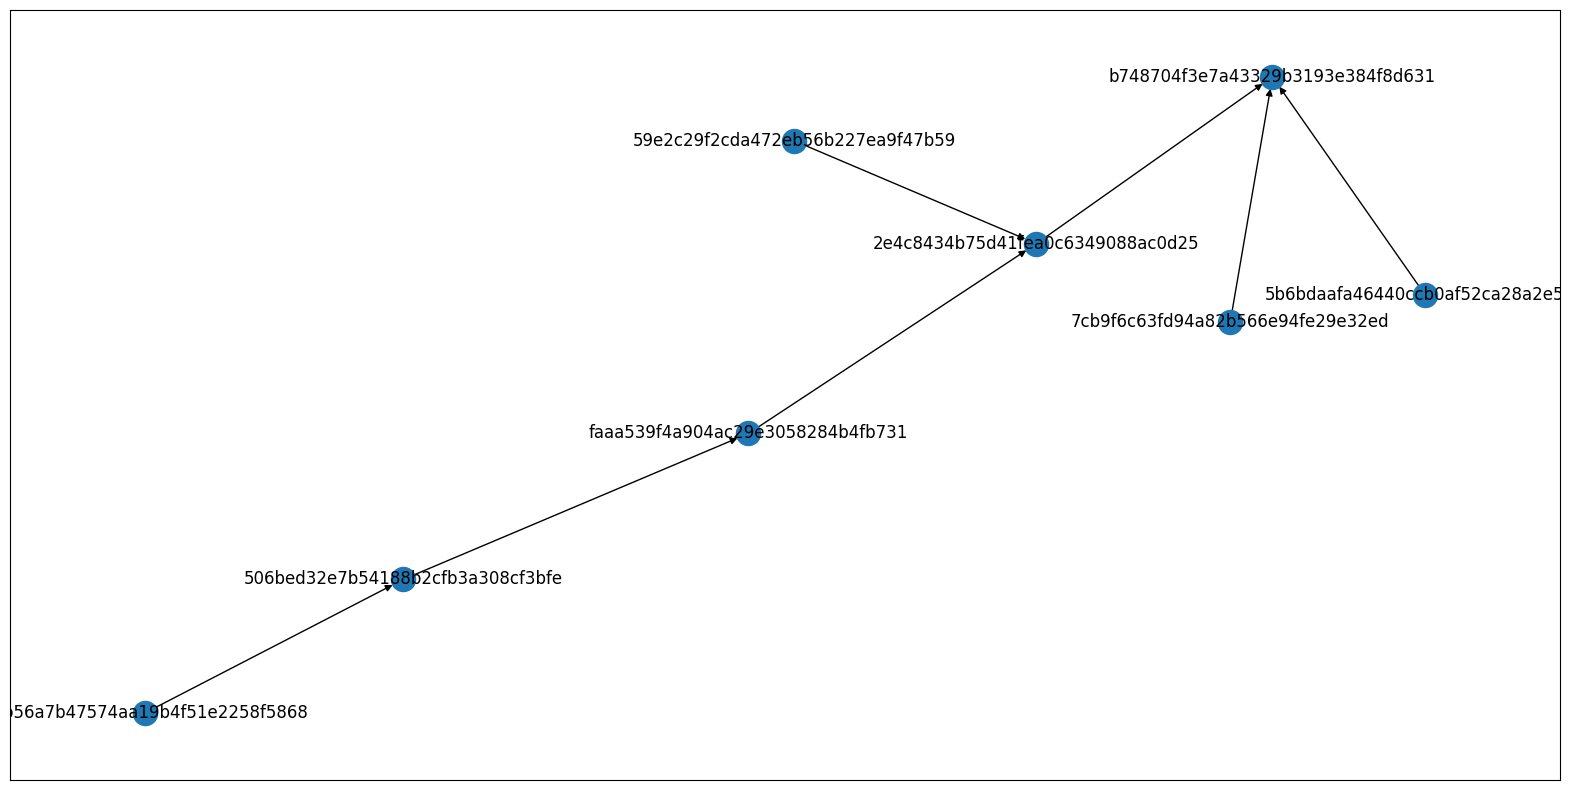

In [27]:
in_mem_action_graph_service.store.graph.visualize()

In [28]:
in_mem_action_graph_service.get_all_nodes(authed_context)

NodeDataView({<UID: 98b56a7b47574aa19b4f51e2258f5868>: {'data': class NodeActionData:
  id: str = 98b56a7b47574aa19b4f51e2258f5868
  type: str = NodeType.ACTION_OBJECT
  status: str = ExecutionStatus.PROCESSING
  retry: str = 0
  created_at: str = 2023-05-12 01:56:52
  updated_at: str = None
  user_verify_key: str = a2ac3919c0c8662fd7a08d27b75fdf289ada553438a336ad814a284553cac9e0
  is_mutated: str = False
  is_mutagen: str = False
  next_mutagen_node: str = None
  last_nm_mutagen_node: str = None
}, <UID: 506bed32e7b54188b2cfb3a308cf3bfe>: {'data': class NodeActionData:
  id: str = 506bed32e7b54188b2cfb3a308cf3bfe
  type: str = NodeType.ACTION
  status: str = ExecutionStatus.PROCESSING
  retry: str = 0
  created_at: str = 2023-05-12 01:56:52
  updated_at: str = None
  user_verify_key: str = a2ac3919c0c8662fd7a08d27b75fdf289ada553438a336ad814a284553cac9e0
  is_mutated: str = False
  is_mutagen: str = False
  next_mutagen_node: str = None
  last_nm_mutagen_node: str = None
}, <UID: faaa5

In [29]:
pprint(labels_dict)

{<UID: 2e4c8434b75d41fea0c6349088ac0d25>: 'astype',
 <UID: 506bed32e7b54188b2cfb3a308cf3bfe>: 'np.array',
 <UID: 59e2c29f2cda472eb56b227ea9f47b59>: 'np.int32',
 <UID: 5b6bdaafa46440ccb0af52ca28a2e591>: 'val=5',
 <UID: 7cb9f6c63fd94a82b566e94fe29e32ed>: 'idx=2',
 <UID: 98b56a7b47574aa19b4f51e2258f5868>: '[1, 2 ,3]',
 <UID: b748704f3e7a43329b3193e384f8d631>: '__setitem__',
 <UID: faaa539f4a904ac29e3058284b4fb731>: 'd'}


In [30]:
action_node_3

```python
class NodeActionData:
  id: str = b748704f3e7a43329b3193e384f8d631
  type: str = NodeType.ACTION
  status: str = ExecutionStatus.PROCESSING
  retry: str = 0
  created_at: str = 2023-05-12 01:56:52
  updated_at: str = None
  user_verify_key: str = a2ac3919c0c8662fd7a08d27b75fdf289ada553438a336ad814a284553cac9e0
  is_mutated: str = False
  is_mutagen: str = True
  next_mutagen_node: str = None
  last_nm_mutagen_node: str = None

```

In [31]:
action_node_2

```python
class NodeActionData:
  id: str = 2e4c8434b75d41fea0c6349088ac0d25
  type: str = NodeType.ACTION
  status: str = ExecutionStatus.PROCESSING
  retry: str = 0
  created_at: str = 2023-05-12 01:56:52
  updated_at: str = 2023-05-12 01:56:52
  user_verify_key: str = a2ac3919c0c8662fd7a08d27b75fdf289ada553438a336ad814a284553cac9e0
  is_mutated: str = True
  is_mutagen: str = True
  next_mutagen_node: str = b748704f3e7a43329b3193e384f8d631
  last_nm_mutagen_node: str = b748704f3e7a43329b3193e384f8d631

```

In [32]:
print(labels_dict[result_node.id])
result_node

d


```python
class NodeActionData:
  id: str = faaa539f4a904ac29e3058284b4fb731
  type: str = NodeType.ACTION_OBJECT
  status: str = ExecutionStatus.PROCESSING
  retry: str = 0
  created_at: str = 2023-05-12 01:56:52
  updated_at: str = 2023-05-12 01:56:52
  user_verify_key: str = a2ac3919c0c8662fd7a08d27b75fdf289ada553438a336ad814a284553cac9e0
  is_mutated: str = True
  is_mutagen: str = False
  next_mutagen_node: str = 2e4c8434b75d41fea0c6349088ac0d25
  last_nm_mutagen_node: str = b748704f3e7a43329b3193e384f8d631

```

In [33]:
print(labels_dict[result_node_2.id])
result_node_2

d


```python
class NodeActionData:
  id: str = faaa539f4a904ac29e3058284b4fb731
  type: str = NodeType.ACTION_OBJECT
  status: str = ExecutionStatus.PROCESSING
  retry: str = 0
  created_at: str = 2023-05-12 01:56:52
  updated_at: str = 2023-05-12 01:56:52
  user_verify_key: str = a2ac3919c0c8662fd7a08d27b75fdf289ada553438a336ad814a284553cac9e0
  is_mutated: str = True
  is_mutagen: str = False
  next_mutagen_node: str = 2e4c8434b75d41fea0c6349088ac0d25
  last_nm_mutagen_node: str = b748704f3e7a43329b3193e384f8d631

```

In [34]:
print(labels_dict[result_node_3.id])
result_node_3

astype


```python
class NodeActionData:
  id: str = 2e4c8434b75d41fea0c6349088ac0d25
  type: str = NodeType.ACTION
  status: str = ExecutionStatus.PROCESSING
  retry: str = 0
  created_at: str = 2023-05-12 01:56:52
  updated_at: str = 2023-05-12 01:56:52
  user_verify_key: str = a2ac3919c0c8662fd7a08d27b75fdf289ada553438a336ad814a284553cac9e0
  is_mutated: str = True
  is_mutagen: str = True
  next_mutagen_node: str = b748704f3e7a43329b3193e384f8d631
  last_nm_mutagen_node: str = b748704f3e7a43329b3193e384f8d631

```

In [35]:
action.result_id == action2.result_id == action3.result_id

True

In [36]:
print(labels_dict[action_node_2.id])
action_node_2

astype


```python
class NodeActionData:
  id: str = 2e4c8434b75d41fea0c6349088ac0d25
  type: str = NodeType.ACTION
  status: str = ExecutionStatus.PROCESSING
  retry: str = 0
  created_at: str = 2023-05-12 01:56:52
  updated_at: str = 2023-05-12 01:56:52
  user_verify_key: str = a2ac3919c0c8662fd7a08d27b75fdf289ada553438a336ad814a284553cac9e0
  is_mutated: str = True
  is_mutagen: str = True
  next_mutagen_node: str = b748704f3e7a43329b3193e384f8d631
  last_nm_mutagen_node: str = b748704f3e7a43329b3193e384f8d631

```

### Operation on the mutated result: `f = d + 48`

In [37]:
arg_action_obj = ActionObject.from_obj(48)
in_mem_action_graph_service.add_action_obj(context=authed_context, 
                                    action_obj=arg_action_obj)
labels_dict[arg_action_obj.id] = "48"

In [38]:
print(result_node_3 == action_node_2)
print(labels_dict[result_node_3.id])

True
astype


In [39]:
labels_dict[arg_action_obj.id] = "48"

In [40]:
action4 = Action(
    path="action.execute",
    op="__add__",
    remote_self=action.result_id,
    args=[arg_action_obj.syft_lineage_id],
    kwargs={},
)
in_mem_action_graph_service.add_action(context=authed_context, 
                                       action=action4)
labels_dict[action4.id] = "+"
labels_dict[action4.result_id.id] = "F"

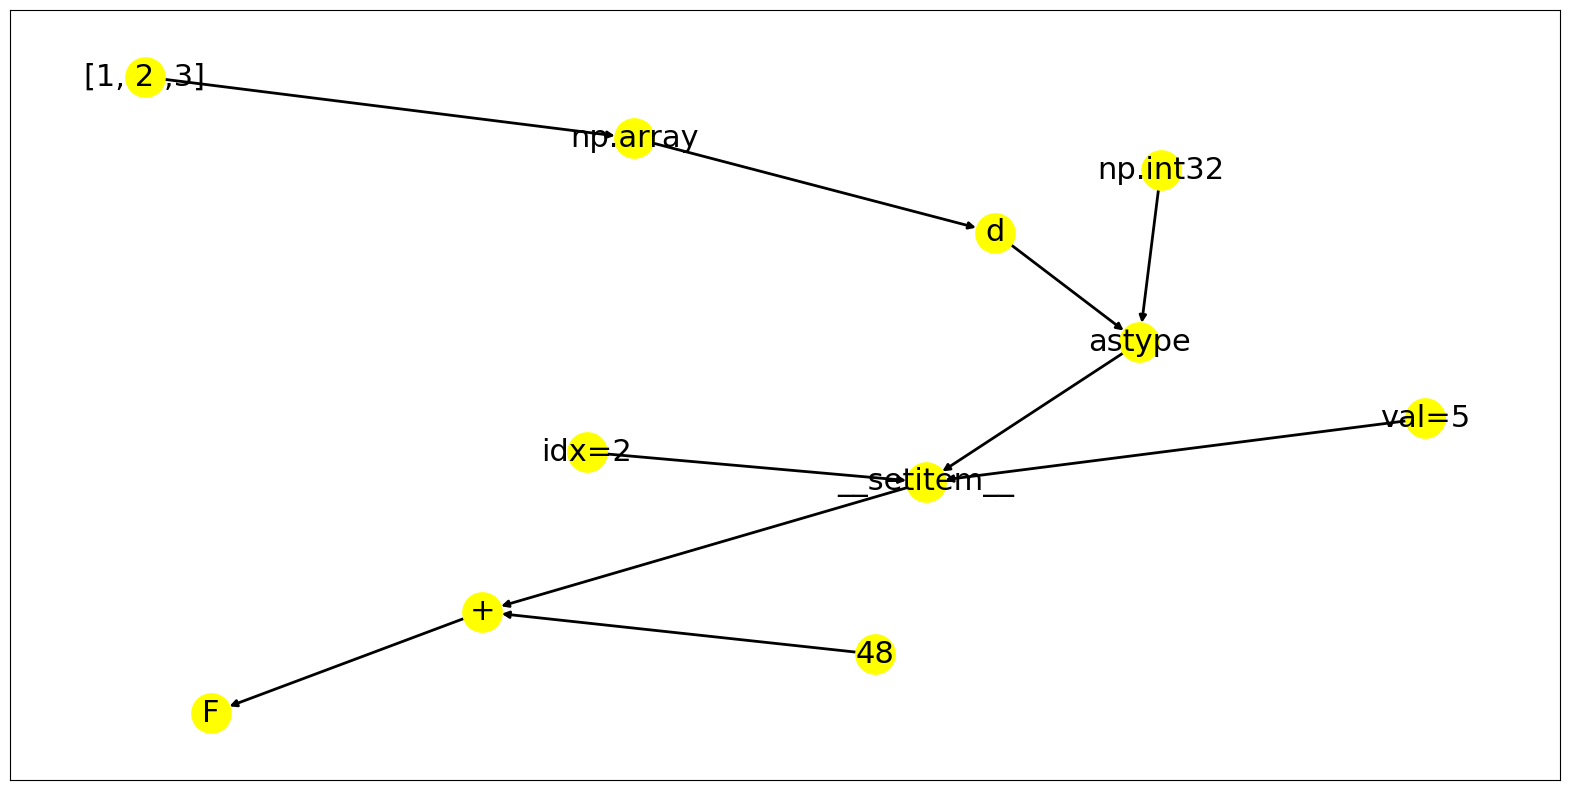

In [41]:
plt.figure(figsize=(20, 10))
pos = nx.spring_layout(G, seed=3113794652)
# nx.draw_networkx_nodes(G, pos=pos)p
nx.draw_networkx(G, pos=pos, labels=labels_dict, with_labels=True, width=2.0, 
                 node_color="yellow", node_size=800, font_size=22)

When we add the `action4` using the action graph service, first we find that an input is the node `d` (the `remote_self=action.result_id`). Then when calling `store.set`, it calls the `add_edge` function which calls `_get_last_non_mutated_mutagen` to find out that `__set_item__` is the last non_mutated_mutagen node of `d`

In [42]:
in_mem_action_graph_service._extract_input_and_output_from_action(action4)

({<UID: 7475be46b064406b88cd575bf6183dde>,
  <UID: faaa539f4a904ac29e3058284b4fb731>},
 <UID: 6452be166bbe48d6a9f8c9098e10a7b4>)

In [43]:
pprint(labels_dict)

{<UID: 2e4c8434b75d41fea0c6349088ac0d25>: 'astype',
 <UID: 506bed32e7b54188b2cfb3a308cf3bfe>: 'np.array',
 <UID: 59e2c29f2cda472eb56b227ea9f47b59>: 'np.int32',
 <UID: 5b6bdaafa46440ccb0af52ca28a2e591>: 'val=5',
 <UID: 6452be166bbe48d6a9f8c9098e10a7b4>: 'F',
 <UID: 7475be46b064406b88cd575bf6183dde>: '48',
 <UID: 7cb9f6c63fd94a82b566e94fe29e32ed>: 'idx=2',
 <UID: 98b56a7b47574aa19b4f51e2258f5868>: '[1, 2 ,3]',
 <UID: b748704f3e7a43329b3193e384f8d631>: '__setitem__',
 <UID: d612e98a5c9b45c2990f04b16502500f>: '+',
 <UID: faaa539f4a904ac29e3058284b4fb731>: 'd'}


In [44]:
in_mem_action_graph_service.store.is_parent(parent=action3.id, child=action4.id)

Ok(True)

### Another Mutation on `d`

In [45]:
labels_dict[action.result_id.id]

'd'

In [46]:
as_type_action_obj2 = ActionObject.from_obj('np.float64')
in_mem_action_graph_service.add_action_obj(context=authed_context, 
                                           action_obj=as_type_action_obj2)
labels_dict[as_type_action_obj2.id] = "np.float64"

action5 = Action(
    path="action.execute",
    op="astype",
    remote_self=action.result_id,
    args=[as_type_action_obj2.syft_lineage_id],
    kwargs={},
    result_id=action.result_id
)
action_node_5, result_node_5 = in_mem_action_graph_service.add_action(
    context=authed_context, action=action5
)
labels_dict[action5.id] = "astype_2"

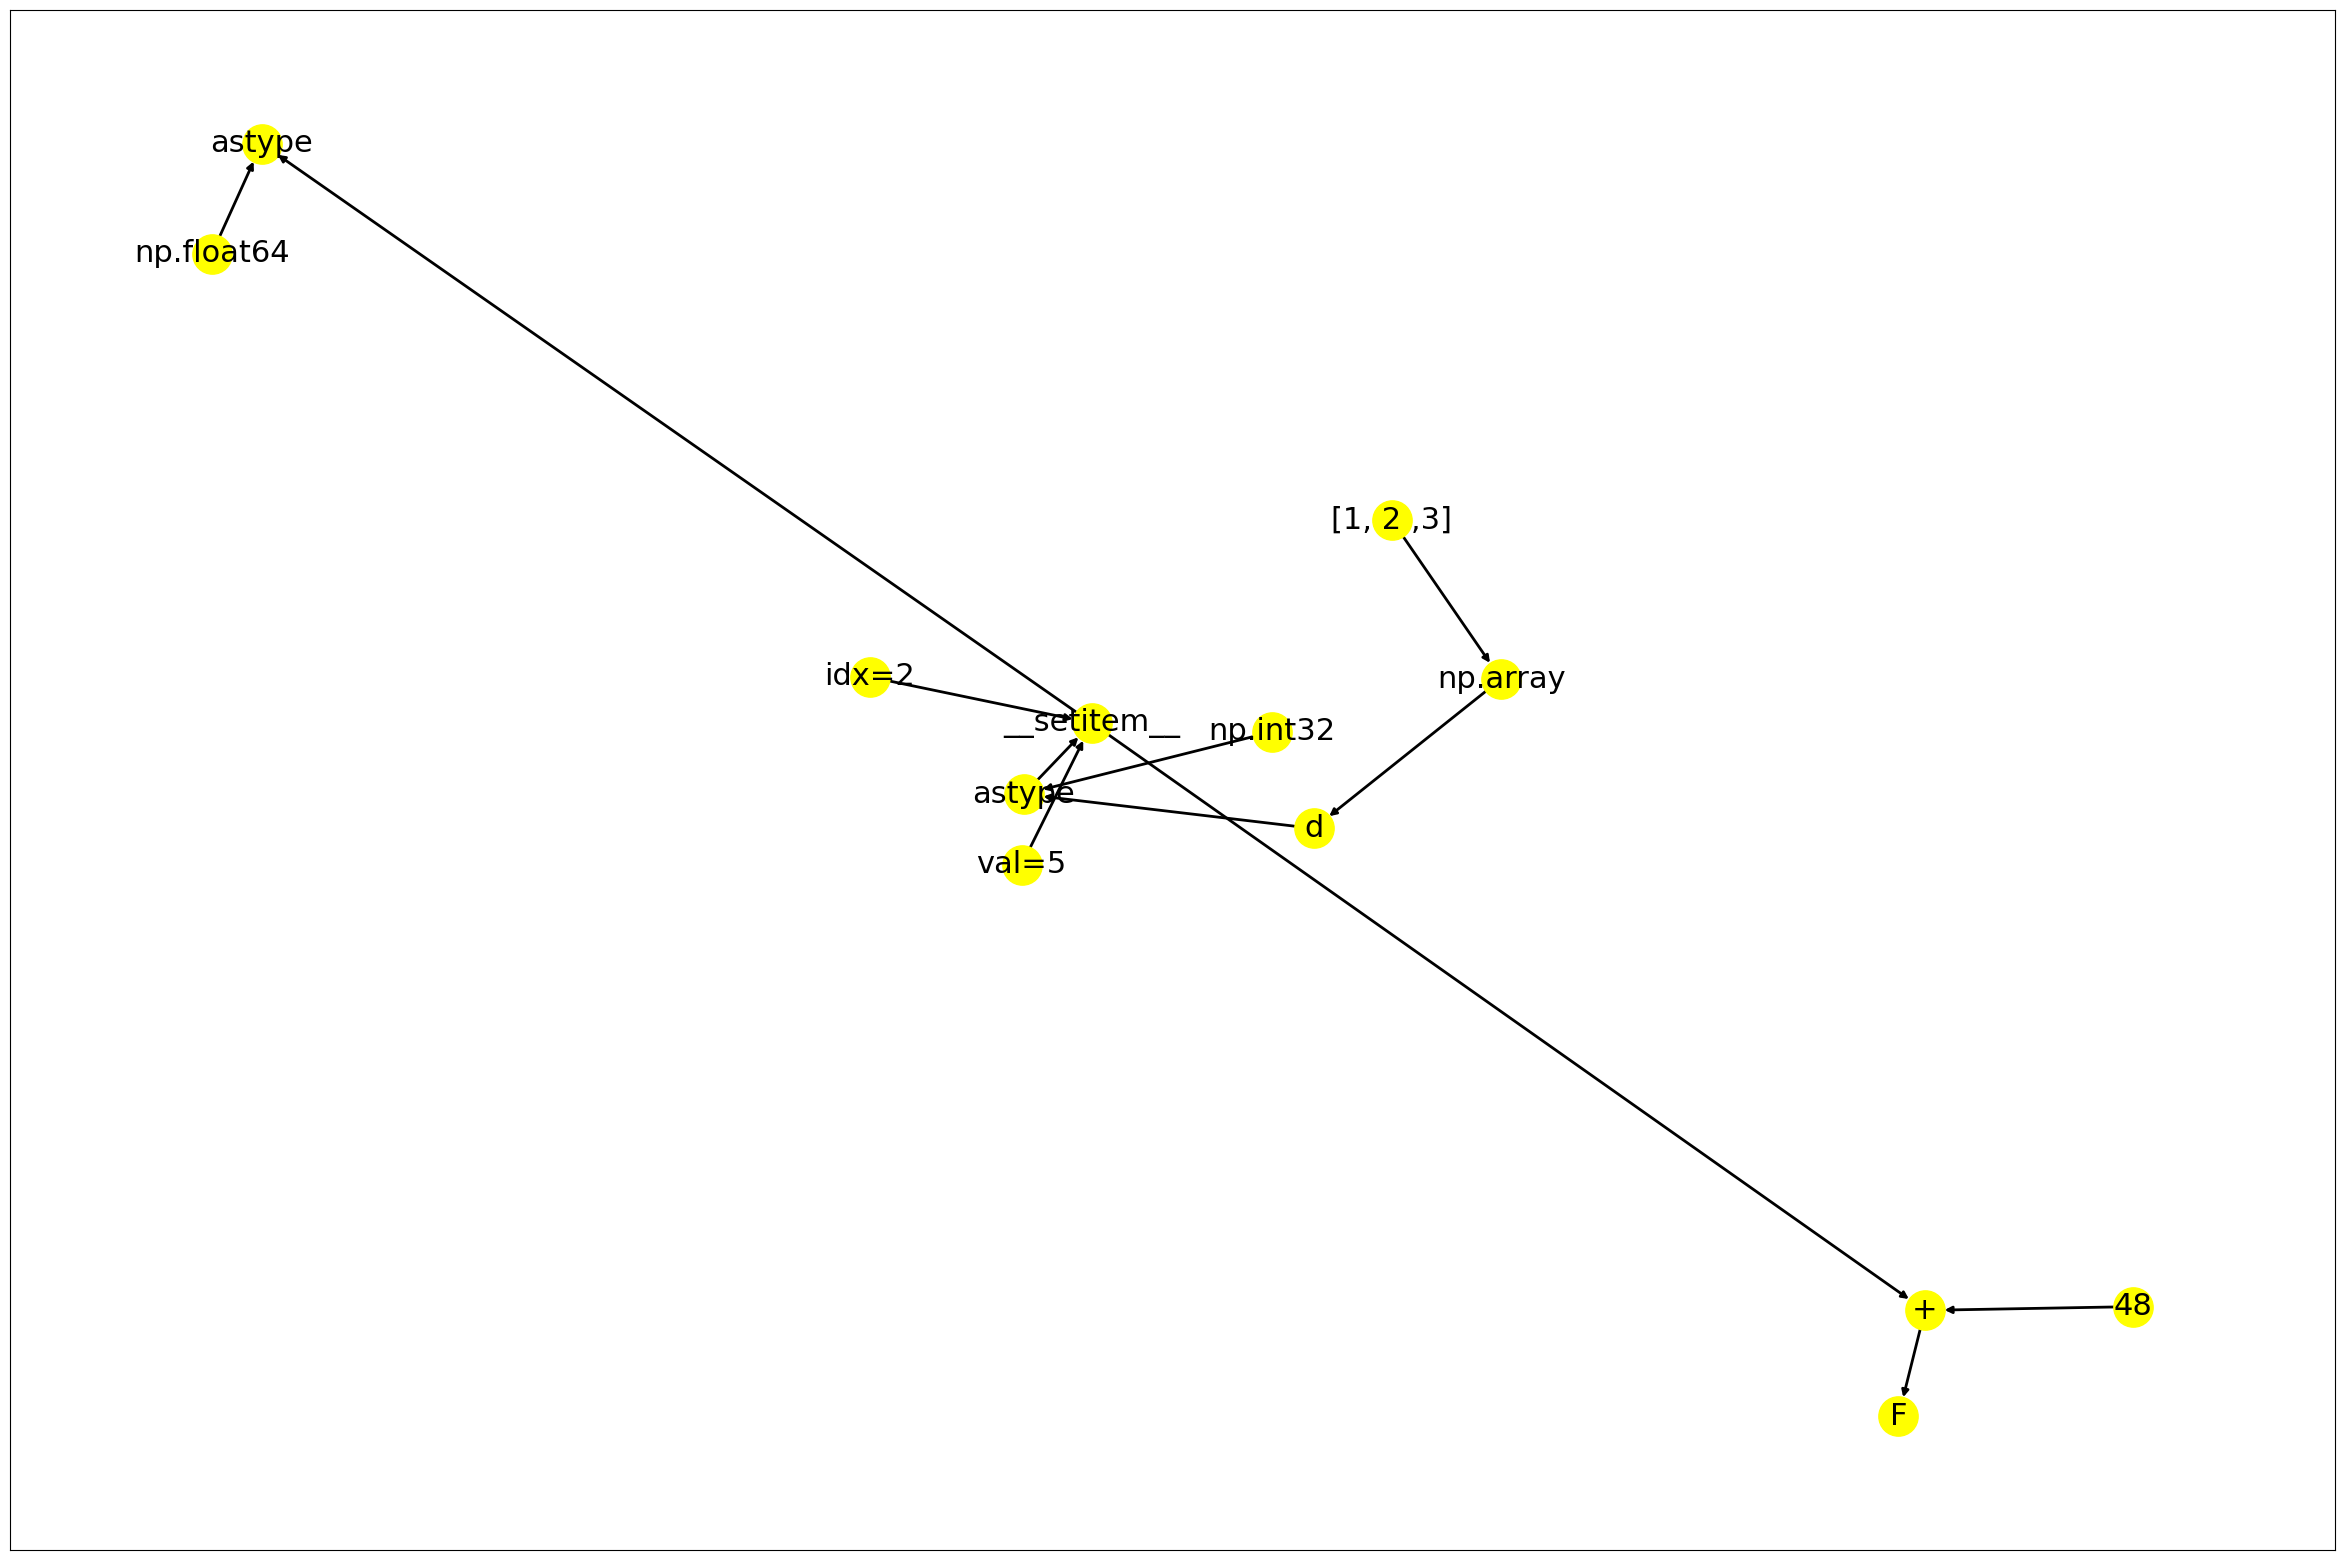

In [47]:
plt.figure(figsize=(30, 20))
pos = nx.spring_layout(G, seed=3113794652)
# nx.draw_networkx_nodes(G, pos=pos)p
nx.draw_networkx(G, pos=pos, labels=labels_dict, with_labels=True, width=2.0, 
                 node_color="yellow", node_size=800, font_size=22)

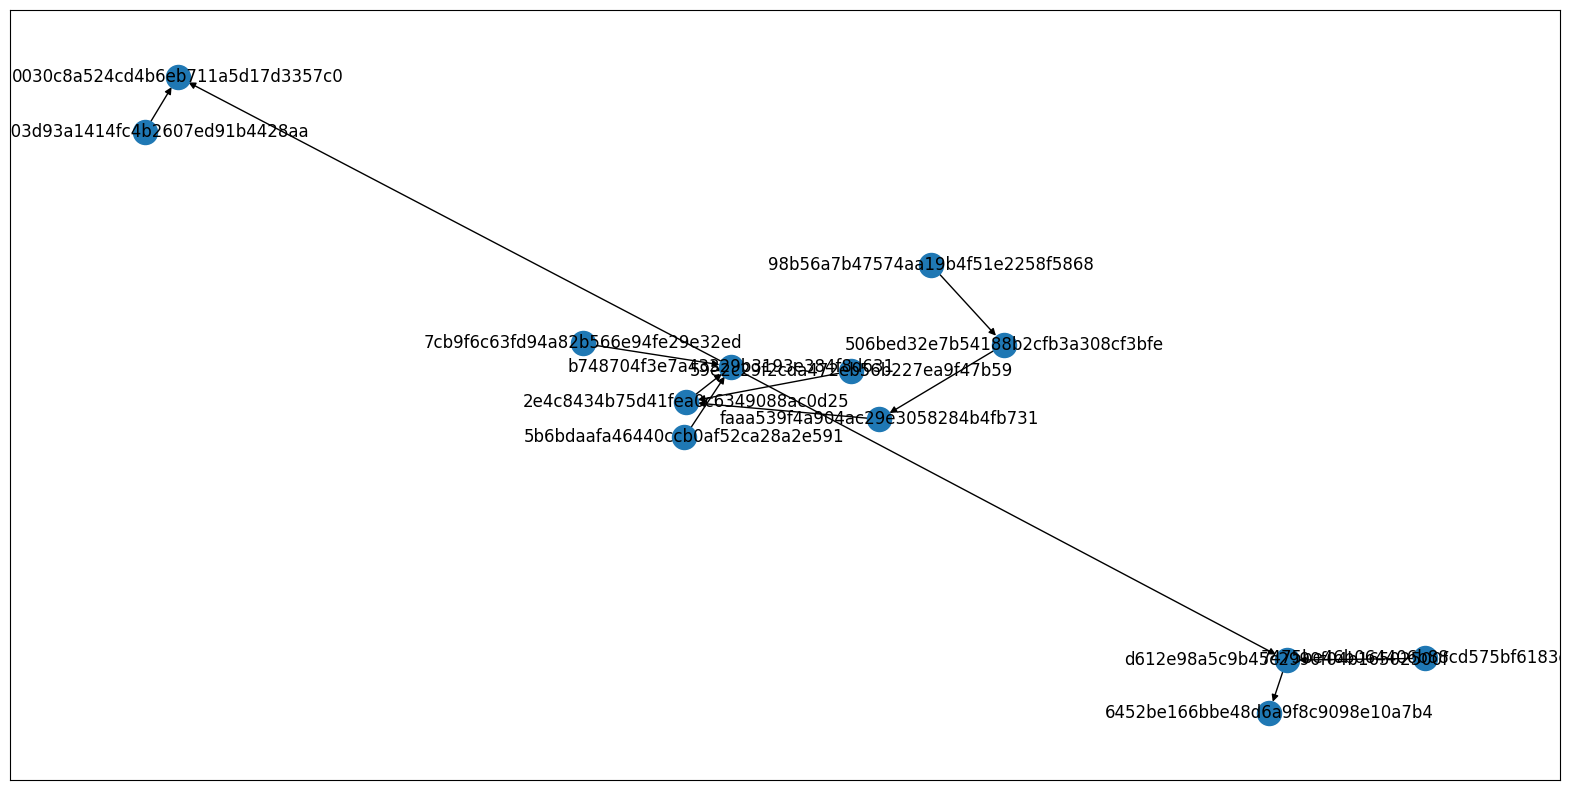

In [48]:
in_mem_action_graph_service.store.graph.visualize()

In [49]:
in_mem_action_graph_service.get_all_nodes(authed_context)

NodeDataView({<UID: 98b56a7b47574aa19b4f51e2258f5868>: {'data': class NodeActionData:
  id: str = 98b56a7b47574aa19b4f51e2258f5868
  type: str = NodeType.ACTION_OBJECT
  status: str = ExecutionStatus.PROCESSING
  retry: str = 0
  created_at: str = 2023-05-12 01:56:52
  updated_at: str = None
  user_verify_key: str = a2ac3919c0c8662fd7a08d27b75fdf289ada553438a336ad814a284553cac9e0
  is_mutated: str = False
  is_mutagen: str = False
  next_mutagen_node: str = None
  last_nm_mutagen_node: str = None
}, <UID: 506bed32e7b54188b2cfb3a308cf3bfe>: {'data': class NodeActionData:
  id: str = 506bed32e7b54188b2cfb3a308cf3bfe
  type: str = NodeType.ACTION
  status: str = ExecutionStatus.PROCESSING
  retry: str = 0
  created_at: str = 2023-05-12 01:56:52
  updated_at: str = None
  user_verify_key: str = a2ac3919c0c8662fd7a08d27b75fdf289ada553438a336ad814a284553cac9e0
  is_mutated: str = False
  is_mutagen: str = False
  next_mutagen_node: str = None
  last_nm_mutagen_node: str = None
}, <UID: faaa5

In [51]:
pprint(labels_dict)

{<UID: 0030c8a524cd4b6eb711a5d17d3357c0>: 'astype',
 <UID: 2e4c8434b75d41fea0c6349088ac0d25>: 'astype',
 <UID: 506bed32e7b54188b2cfb3a308cf3bfe>: 'np.array',
 <UID: 59e2c29f2cda472eb56b227ea9f47b59>: 'np.int32',
 <UID: 5b6bdaafa46440ccb0af52ca28a2e591>: 'val=5',
 <UID: 6452be166bbe48d6a9f8c9098e10a7b4>: 'F',
 <UID: 6b303d93a1414fc4b2607ed91b4428aa>: 'np.float64',
 <UID: 7475be46b064406b88cd575bf6183dde>: '48',
 <UID: 7cb9f6c63fd94a82b566e94fe29e32ed>: 'idx=2',
 <UID: 98b56a7b47574aa19b4f51e2258f5868>: '[1, 2 ,3]',
 <UID: b748704f3e7a43329b3193e384f8d631>: '__setitem__',
 <UID: d612e98a5c9b45c2990f04b16502500f>: '+',
 <UID: faaa539f4a904ac29e3058284b4fb731>: 'd'}
